# Give it a try....

This Notebook was created in order to get in touch with the GANerAid library which offers functions to synthetisise tabular data, using the technology of Generative Adversarial Networks. It was meant to generate synthetic patient data “reflecting” the original input of clinicals trials to get the most out of it. From Data Science perspective as well as Data Privacy. 

To get it up an running quickly we prepared this little walktrough for you which was set up with kaggles "Breast Cancer Dataset". You can to use any tabular dataset in CSV or excel format (e.g. financial data, vehicle data,... ) but please make sure that is does not contain Strings and binary variables have to set to the values 0 and 1. Furthermore, you should preferably use continous variables and bianry variables, as we have focused on these when setting up the model. 

#### Let's start with the installation process...

In [ ]:
!pip install GANerAid --upgrade

If you cannot run this cell sucessfully it might be caused by missing libraries. Please check the error message, if one of these libraries is not installed and run the next cell with the respective library name. Then try again the cell above.
- numpy
- pandas
- torch
- scikit-learn
- seaborn
- tqdm
- tab-gan-metrics
- matplotlib

In [ ]:
!pip install NAME_OF_LIBRARY --upgrade

#### Import all the necessary libraries 

In [8]:
import pandas as pd
from GANerAid.ganeraid import GANerAid
from GANerAid.evaluation_report import EvaluationReport
from GANerAid.experiment_runner import ExperimentRunner
import torch
import matplotlib.pyplot as plt

#### Read in Data
Convert any dataset to a Pandas Dataframe and have a first look at it by running the next cells.

In [3]:
original_data = pd.read_csv("Breast_cancer_data.csv")
#original_data = pd.read_excel('ANY_EXCEL_DATA_PATH')

In [4]:
original_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
original_data.shape

(569, 6)

#### Set up Device
We advise you to include your local GPU in the training process to speed up the Model training process. Running the next cell will activate the GPU. In case that you use MacOS, the GPU can not be chosen and we will go on with CPU only.

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Set up GAN 
Now you can choose if you want to setup the GAN using the default parameter or uncomment the second line of code to customise the input parameters. Further information regarding to that can be found in our README.md.

In [7]:
gan = GANerAid(device)
#gan = GANerAid(device,lr_d=5e-4 ,lr_g=5e-4, noise_factor=5, hidden_feature_space=200, batch_size=100, nr_of_rows=25, binary_noise=0.2)

Initialized gan with the following parameters: 
lr_d = 0.0005
lr_g = 0.0005
hidden_feature_space = 200
batch_size = 100
nr_of_rows = 25
binary_noise = 0.2


#### Train the GAN
Now you can fit the GAN to train the Discriminator als well an the Generator. Again you can either use the default parameters or adjust it using the second line of code in the next cell. Btw: If you run the fit() function several times you do not overwrite the training epochs before but go on training based the result you achieved in former runs.

In [8]:
#history = gan.fit(original_data)
history = gan.fit(original_data, epochs=50000, verbose=True, aug_factor=1)

Start training of gan for 50000 epochs


100%|██████████| 50000/50000 [23:40<00:00, 35.20it/s, loss=d error: 1.407194972038269 --- g error 0.6483931541442871] 


If you want, you can plot the history of you last training run, to see the progress of the Discriminator loss (blue) and the Generator loss (orange).

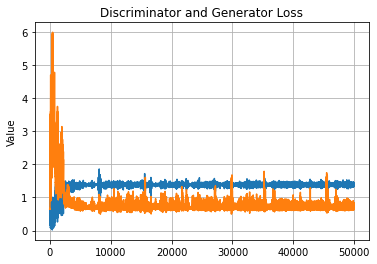

In [9]:
gan.plot_history(history) 

#### Generate synthetic Data
Now you can use the GAN to generate a new dataset reflecting the original data. We advise you to pass the generate number of samples (rows) as in the original dataset to get the most out of the evaluation.

In [10]:
generated_data = gan.generate(569)

Generating 569 samples


In [11]:
generated_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,11.838673,21.530228,73.651138,450.049042,0.068276,1
1,22.694443,28.295740,154.021606,1636.489502,0.086061,0
2,14.186035,22.073549,95.651283,657.496399,0.092839,1
3,17.537369,14.857543,114.639290,896.470093,0.089819,1
4,13.148300,21.556694,86.775085,545.037598,0.101480,0


In [12]:
generated_data.shape

(569, 6)

#### Evaluate the Data 
Let's have a look if you got the desired result out of the generation process. Therefore we create an EvaluationReport object where you can pass the original dataset and then the generated data. 

In [13]:
evaluation_report = gan.evaluate(original_data, generated_data)

There are different functions provided for evaluation. You can try them by running the next five cells. Further information about the metrics can again be found in our README.md.



EVALUATION REPORT
----------------------------


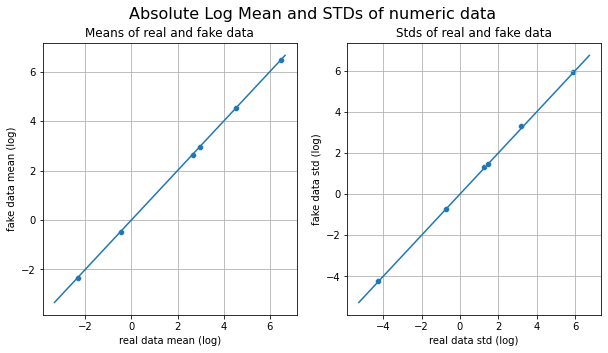

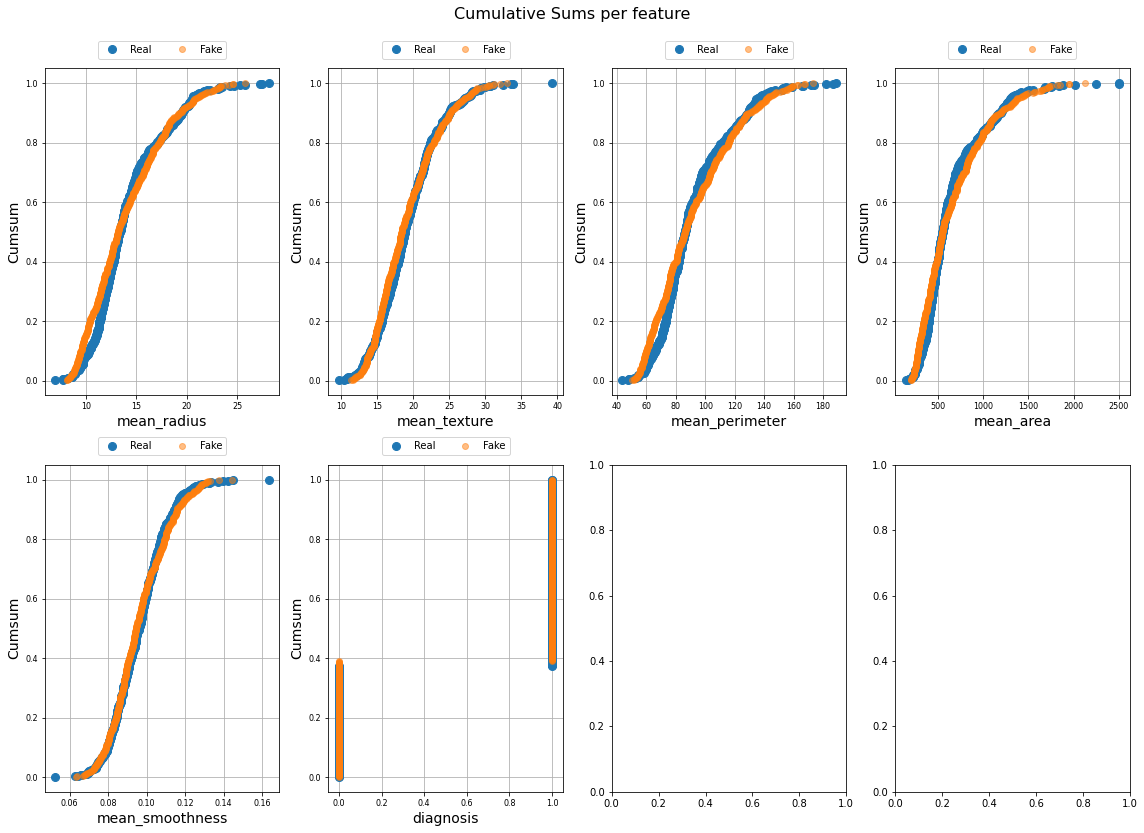

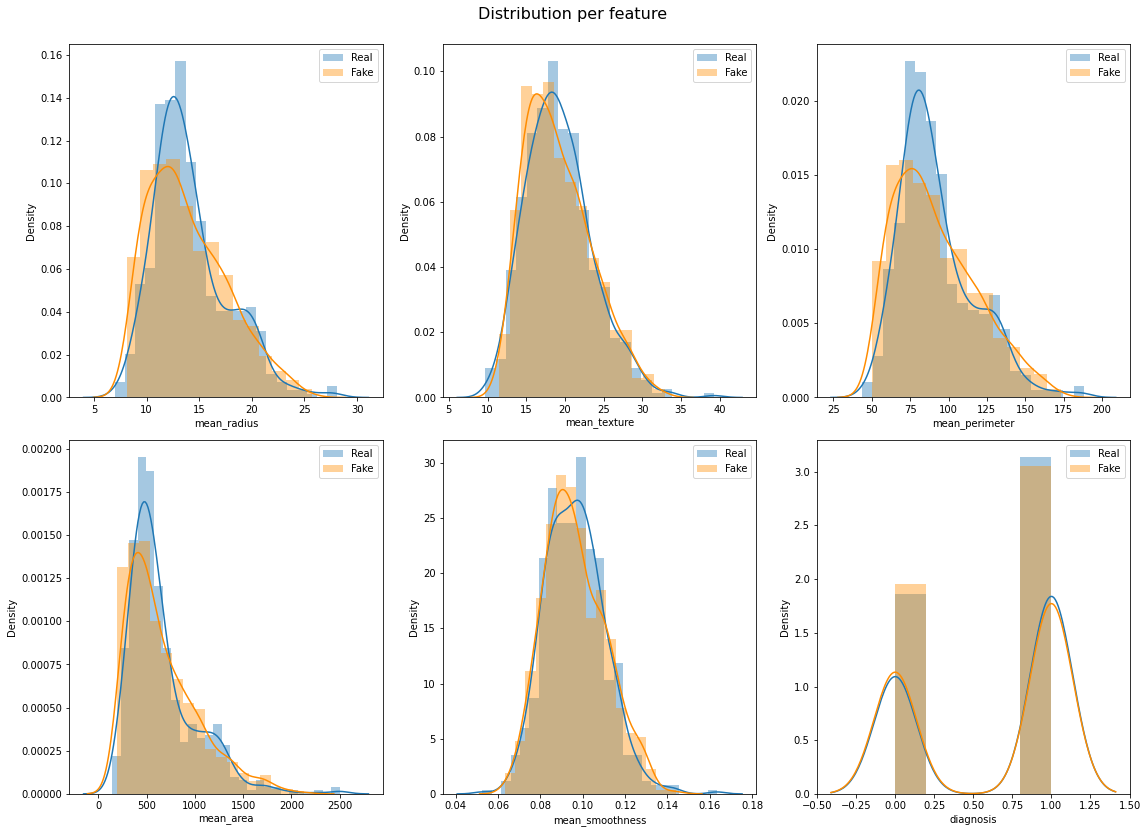

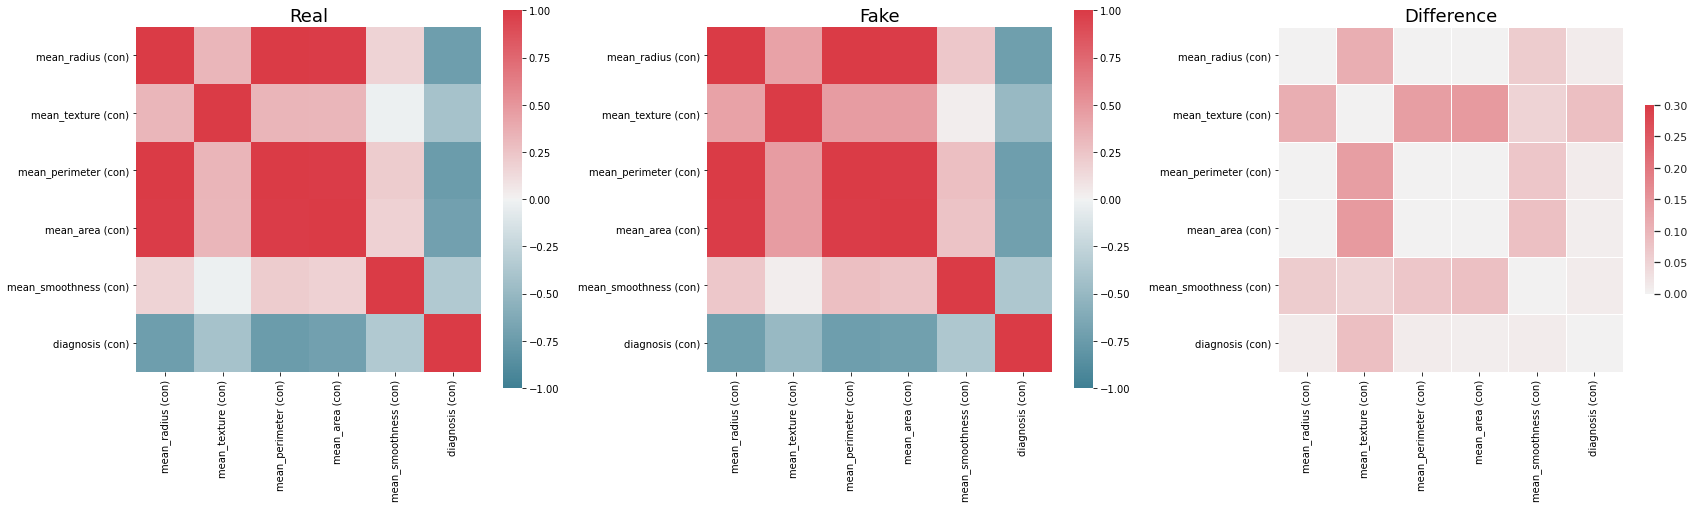

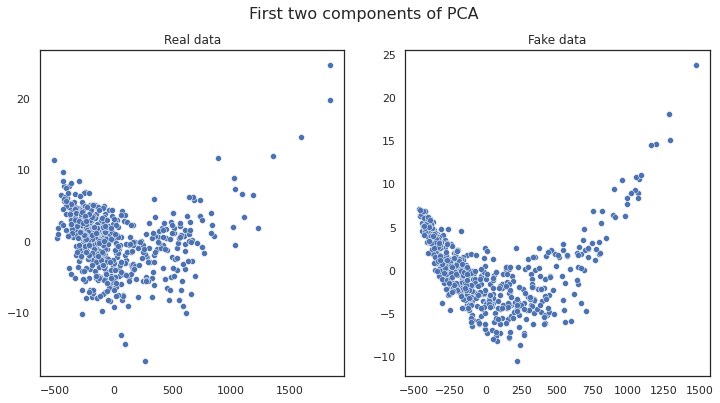

In [14]:
evaluation_report.plot_evaluation_metrics()

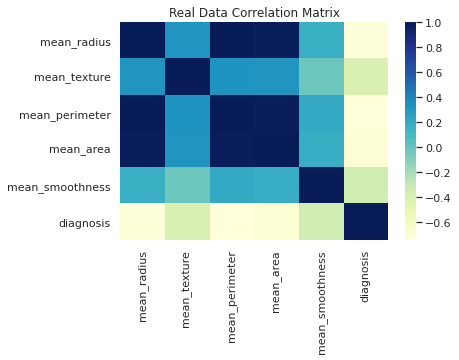

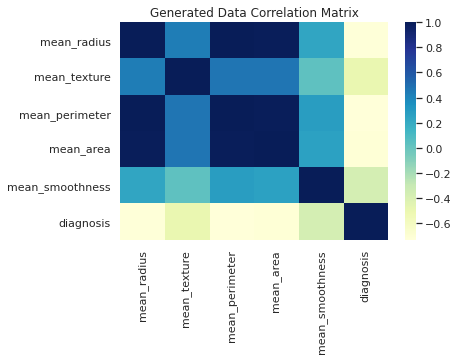

In [15]:
evaluation_report.plot_correlation()

In [16]:
evaluation_report.get_correlation_metrics()



CORRELATION METRICS
----------------------------
Euclidean Distance 0.3879741288332115
Root Mean Square Error (RMSE) for Column mean_radius: 5.296494403572406
Root Mean Square Error (RMSE) for Column mean_texture: 6.102651740466742
Root Mean Square Error (RMSE) for Column mean_perimeter: 37.2865100898512
Root Mean Square Error (RMSE) for Column mean_area: 522.3827844899649
Root Mean Square Error (RMSE) for Column mean_smoothness: 0.020616255776569312
Root Mean Square Error (RMSE) for Column diagnosis: 0.7163665397910218


In [17]:
evaluation_report.get_duplicates()



DUPLICATES
----------------------------
Real dataset contains {} duplicated rows 0
Generated dataset contains {} duplicated rows 0
Real and generated dataset contain {} duplicated rows 0


In [18]:
evaluation_report.get_KL_divergence()



KULLBACK-LEIBLER DIVERGENCE
----------------------------
mean_radius : 666.41692352664
mean_texture : 621.6978484364051
mean_perimeter : 4357.3124981663195
mean_area : 103860.67373471207
mean_smoothness : 1.230382599251734
diagnosis : inf


#### Persist the model
Finally you might want to save the model. This can easily be done by passing a path and a name. Also you can again load in you training weights for further use. 

In [25]:
gan.save("./models", "MY_VERY_BEST_GAN.gan")

Gan successfully saved under the path ./models and the name MY_VERY_BEST_GAN.gan


In [26]:
gan.load(device, "./models", "MY_VERY_BEST_GAN.gan")

Initialized gan with the following parameters: 
lr_d = 0.0005
lr_g = 0.0005
hidden_feature_space = 200
batch_size = 100
nr_of_rows = 25
binary_noise = 0.2


#### Parameter optimisation

If you are still faced with the question of which parameter combinations provide the best results for your data set, the parameter optimization function may be of help:

In [22]:
#define parameters
parameters = [{'lr_d': 5e-4, 'epochs': 500, 'sample_size': 5},
              {'lr_d': 5e-9, 'epochs': 500, 'sample_size': 5}]

#create exepriment runner instance
ex_runner = ExperimentRunner(device, original_data, parameters)

Now, you can execute the runner. Additionally, the trained models can be saved as seen in the example below.

In [23]:
#execute experiments and save trained models
experiment_results = ex_runner.execute_experiment(save_models=True, save_path="experiment")

  0%|          | 0/500 [00:00<?, ?it/s, loss=d error: 1.3654575943946838 --- g error 0.6869127154350281]

Running experiment {'lr_d': 0.0005, 'epochs': 500, 'sample_size': 5}
Initialized gan with the following parameters: 
lr_d = 0.0005
lr_g = 0.0005
hidden_feature_space = 200
batch_size = 100
nr_of_rows = 25
binary_noise = 0.2
Start training of gan for 500 epochs


  1%|          | 5/500 [00:00<00:12, 40.53it/s, loss=d error: 1.3871474862098694 --- g error 0.6313859820365906]

Generating 5 samples
Gan successfully saved under the path experiment/lr_d_0.0005-epochs_500-sample_size_5 and the name GANerAid
Running experiment {'lr_d': 5e-09, 'epochs': 500, 'sample_size': 5}
Initialized gan with the following parameters: 
lr_d = 5e-09
lr_g = 0.0005
hidden_feature_space = 200
batch_size = 100
nr_of_rows = 25
binary_noise = 0.2
Start training of gan for 500 epochs


100%|██████████| 500/500 [00:12<00:00, 41.05it/s, loss=d error: 1.4523284435272217 --- g error 0.5846768617630005]


Generating 5 samples
Gan successfully saved under the path experiment/lr_d_5e-09-epochs_500-sample_size_5 and the name GANerAid


The results can be stored in a variable and be accessed for each of your specified parameter sets:

In [31]:
#evaluation results are stored each as a dictionary in a list and can be sperately analysed
experiment_results[1]

{'parameters': {'lr_d': 5e-09, 'epochs': 500, 'sample_size': 5},
 'evaluationResult': <GANerAid.evaluation_report.EvaluationReport at 0x7f6a70fb2bb0>}

You can analyse the results using the functions of the evaluation-report presented above. Once you found the best parameters for your dataset you can continue fitting/training until you get you desired outcome. 